# Intesive training

Here I will try to train the convolutional neural network as much as possible and I will hope that the result will be more accurate then when trained during active learning.

In [425]:
import h5py
from IPython.display import SVG
from keras import callbacks, utils
import numpy as np
import pandas as pd
from active_cnn import model
from active_cnn import performance
from active_cnn import plot

In [36]:
# load the training data
with h5py.File('data/run-09-11-2018/learning-data.h5', 'r') as f:
    it_grp = f['iteration_17']
    X = it_grp['X'][...]
    ids = it_grp['ids'][...]
    X_tr = it_grp['X_tr'][...]
    y_tr = it_grp['y_tr'][...]
    ids_tr = it_grp['ids_tr'][...]
    labels_old = it_grp['labels'][...]

In [21]:
# encode the vector of labels into one-hot-encoded vector
one_hot_y_tr = utils.to_categorical(y_tr, num_classes=3)
one_hot_y_tr.shape

(14636, 3)

In [26]:
callback = callbacks.EarlyStopping(
    monitor='loss',
    min_delta=10e-5,
    patience=100,
    restore_best_weights=True
)
cnn.fit(
    X_tr.reshape(-1, 140, 1),
    one_hot_y_tr,
    epochs=1000,
    callbacks=[callback],
    verbose=1
)

Epoch 1/1000
14636/14636 [==============================] - 10s 690us/step - loss: 0.3104
Epoch 2/1000
14636/14636 [==============================] - 5s 339us/step - loss: 0.1537
Epoch 3/1000
14636/14636 [==============================] - 5s 338us/step - loss: 0.1296
Epoch 4/1000
14636/14636 [==============================] - 5s 327us/step - loss: 0.1120
Epoch 5/1000
14636/14636 [==============================] - 5s 347us/step - loss: 0.1055
Epoch 6/1000
14636/14636 [==============================] - 5s 347us/step - loss: 0.0999
Epoch 7/1000
14636/14636 [==============================] - 5s 345us/step - loss: 0.0914
Epoch 8/1000
14636/14636 [==============================] - 5s 349us/step - loss: 0.0860
Epoch 9/1000
14636/14636 [==============================] - 5s 342us/step - loss: 0.0836
Epoch 10/1000
14636/14636 [==============================] - 5s 346us/step - loss: 0.0734
Epoch 11/1000
14636/14636 [==============================] - 5s 342us/step - loss: 0.0740
Epoch 12/1000
1463

14636/14636 [==============================] - 5s 349us/step - loss: 0.0392
Epoch 93/1000
14636/14636 [==============================] - 5s 345us/step - loss: 0.0248
Epoch 94/1000
14636/14636 [==============================] - 5s 344us/step - loss: 0.0255
Epoch 95/1000
14636/14636 [==============================] - 5s 351us/step - loss: 0.0333
Epoch 96/1000
14636/14636 [==============================] - 5s 345us/step - loss: 0.0324
Epoch 97/1000
14636/14636 [==============================] - 5s 344us/step - loss: 0.0244
Epoch 98/1000
14636/14636 [==============================] - 5s 351us/step - loss: 0.0348
Epoch 99/1000
14636/14636 [==============================] - 5s 341us/step - loss: 0.0338
Epoch 100/1000
14636/14636 [==============================] - 5s 346us/step - loss: 0.0403
Epoch 101/1000
14636/14636 [==============================] - 5s 340us/step - loss: 0.0313
Epoch 102/1000
14636/14636 [==============================] - 5s 344us/step - loss: 0.0257
Epoch 103/1000
14636/

14636/14636 [==============================] - 5s 342us/step - loss: 0.0152
Epoch 273/1000
14636/14636 [==============================] - 5s 317us/step - loss: 0.0202
Epoch 274/1000
14636/14636 [==============================] - 5s 327us/step - loss: 0.0412
Epoch 275/1000
14636/14636 [==============================] - 5s 328us/step - loss: 0.0680
Epoch 276/1000
14636/14636 [==============================] - 5s 347us/step - loss: 0.0533
Epoch 277/1000
14636/14636 [==============================] - 5s 336us/step - loss: 0.0321
Epoch 278/1000
14636/14636 [==============================] - 5s 332us/step - loss: 0.0289
Epoch 279/1000
14636/14636 [==============================] - 5s 350us/step - loss: 0.0284
Epoch 280/1000
14636/14636 [==============================] - 5s 342us/step - loss: 0.0253
Epoch 281/1000
14636/14636 [==============================] - 5s 340us/step - loss: 0.0271
Epoch 282/1000
14636/14636 [==============================] - 5s 340us/step - loss: 0.0263
Epoch 283/1000

In [473]:
cnn.save('candidates/cnn.h5')

In [28]:
y = cnn.predict(X.reshape(-1, 140, 1), verbose=1, batch_size=2 ** 14)

4134782/4134782 [==============================] - 94s 23us/step


In [37]:
labels = np.argmax(y, axis=1)
np.unique(labels, return_counts=True)

(array([0, 1, 2]), array([4130621,    3574,     587]))

In [39]:
# prediction from active learning
np.unique(labels_old, return_counts=True)

(array([0, 1, 2]), array([4128390,    5314,    1078]))

## Estimate Performance

Because there are no true labels in LAMOST data, the accuracy need to be estimated. Here I use confidence interval to estimate the uncertainty in the estimate. I provide the 95% lower bound.

### Double-peak

In [41]:
double_peak_ids = ids[labels == 2]
double_peak_ids.shape

(587,)

In [46]:
np.random.shuffle(double_peak_ids)
shuffled_double_peak_ids = (f for f in double_peak_ids)
double_peak_sample = []

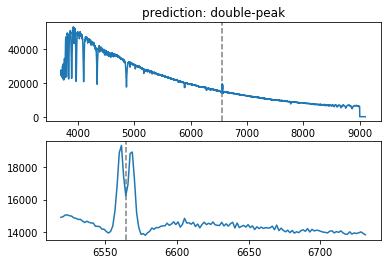

In [216]:
plot.preview_lamost_spectrum(next(shuffled_double_peak_ids), 2)

In [217]:
double_peak_sample.append(1)

In [139]:
double_peak_sample.append(0)

In [218]:
performance.lower_confidence_limit(double_peak_sample)

n:	81
t:	1.6641245785296965
std:	0.3447131568330794
mean:	0.8641975308641975
confidence:	0.95


0.8004591267721431

### Emission

In [219]:
emission_ids = ids[labels == 1]
emission_ids.shape

(3574,)

In [220]:
np.random.shuffle(emission_ids)
shuffled_emission_ids = (f for f in emission_ids)
emission_sample = []

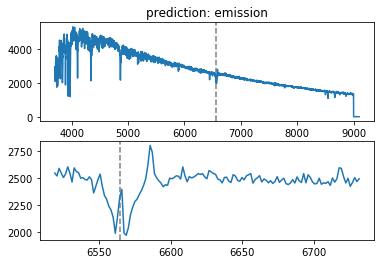

In [422]:
plot.preview_lamost_spectrum(next(shuffled_emission_ids), 1)

In [423]:
emission_sample.append(1)

In [390]:
emission_sample.append(0)

In [424]:
performance.lower_confidence_limit(emission_sample)

n:	100
t:	1.6603911559963895
std:	0.2726599243442907
mean:	0.92
confidence:	0.95


0.8747277873024095

## Candidates

In [472]:
cans = pd.DataFrame(ids[labels != 0], columns=['filename'])
filepaths = list()
for idx, row in cans.iterrows():
    filename = row['filename']
    directory = filename.split('-')[2].split('_sp')[0]
    filepath = '/lamost/fits/' + directory + '/' + filename
    filepaths.append(filepath)
cans['path'] = filepaths
cans['label'] = labels[labels != 0]
cans['label'] = cans['label'].replace({1: 'emission', 2: 'double-peak'})
cans = cans.drop('filename', axis=1)

# add spectra from oracle
oracle_df = pd.read_csv('data/run-9-11-2018/oracle-df.csv')
oracle_df = oracle_df[oracle_df['correct'] != 'not-interesting']

for idx, row in oracle_df.iterrows():
    filename = row['identifier']
    directory = filename.split('-')[2].split('_sp')[0]
    filepath = '/lamost/fits/' + directory + '/' + filename
    cans = cans.append(pd.Series({
        'path': filepath,
        'label': row['correct']
    }), ignore_index=True)

cans.to_csv('candidates.csv', index=False)
cans.shape

(4379, 2)